## Logistic Regression For Classifications

### Objective:
In this assignment, you will implement logistic regression to classify a dataset. You will:
1. Load and preprocess data.
2. Train a logistic regression model.
3. Evaluate the model's performance.
4. Visualize the results.

In [12]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Step 1: Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

### Step 2: Load Dataset

In [15]:
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
X = data.data[data.target != 2]  # Use only class 0 and class 1
y = data.target[data.target != 2]

# Display the first few rows of data
print("Features:\n", X[:5])
print("Labels:\n", y[:5])

Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
 [0 0 0 0 0]


### Step 3: Split Data into Training and Testing Sets

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (70, 4)
Testing data shape: (30, 4)


### Step 4: Train Logistic Regression Model

In [20]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Display the coefficients of the model
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [[ 0.44975352 -0.81943865  2.15275297  0.90757282]]
Intercept: [-6.33875304]


### Step 5: Make Predictions

In [22]:
# Predict the class labels on the test set
y_pred = model.predict(X_test)

# Predict probabilities for each class
y_prob = model.predict_proba(X_test)

print("Predicted Classes:\n", y_pred)
print("Predicted Probabilities:\n", y_prob[:5])

Predicted Classes:
 [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]
Predicted Probabilities:
 [[0.00138809 0.99861191]
 [0.01727551 0.98272449]
 [0.00347239 0.99652761]
 [0.96617439 0.03382561]
 [0.93735729 0.06264271]]


### Step 6: Evaluate the Model

In [24]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[17  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Step 7: Visualize the Results

#### 1. Confusion Matrix

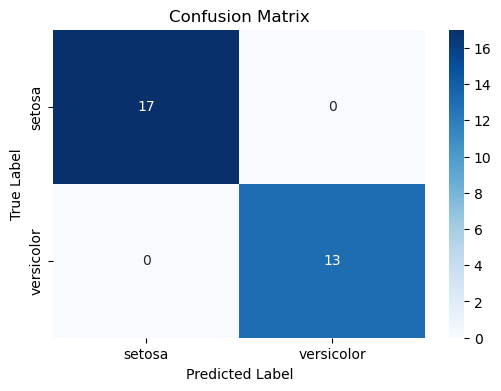

In [26]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names[:2], yticklabels=data.target_names[:2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### 2. ROC Curve

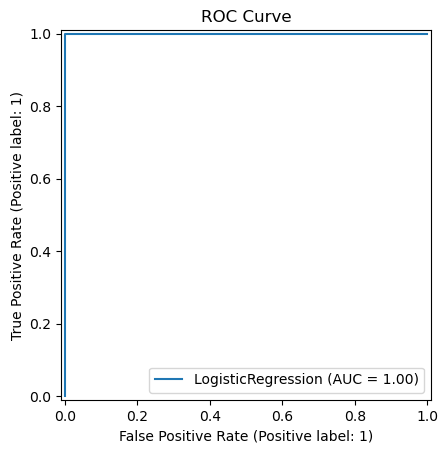

In [28]:
# Plot ROC curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()